In [1]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import axis

In [2]:
# read in data
df = pd.read_csv("../results/final/vary_nconstraints.csv")

df.head()

,dataset,explainer,n_trees,max_depth,nconstr,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,glass,FACETIndex,100,NaN,0,0,0.848485,0.85,0.894737,0.871795,1.0,0.302895,5.850000,16.931376,0.333630,0.016681,20
1,glass,FACETIndex,100,NaN,2,0,0.848485,0.85,0.894737,0.871795,1.0,0.305370,5.950000,16.931376,0.242343,0.012117,20
2,glass,FACETIndex,100,NaN,4,0,0.848485,0.85,0.894737,0.871795,1.0,0.590642,6.500000,16.931376,0.453662,0.022683,20
3,glass,FACETIndex,100,NaN,6,0,0.848485,0.85,0.894737,0.871795,1.0,0.356227,7.100000,16.931376,0.296525,0.014826,20
4,glass,FACETIndex,100,NaN,8,0,0.848485,0.85,0.894737,0.871795,0.9,0.559884,7.944444,16.931376,0.120972,0.006049,20


In [3]:
# Group by nconstraints, dataset taking the average across each iteration
df_grouped = df.groupby(["dataset", "nconstr"], as_index=False).mean() 

df_grouped["explainer"] = "facet"


# show results after 2
df_grouped = df_grouped[(df_grouped['nconstr'] > 1)] 


print(df_grouped.shape) 
df_grouped[["explainer", "dataset", "nconstr", "explain_time", "sample_time"]]

(44, 17)


,explainer,dataset,nconstr,explain_time,sample_time
1,facet,cancer,2,3.768881,0.188444
2,facet,cancer,4,2.554097,0.127705
3,facet,cancer,6,2.182384,0.109119
4,facet,cancer,8,1.667741,0.083387
5,facet,cancer,10,1.175199,0.058760
6,facet,cancer,12,0.778745,0.038937
7,facet,cancer,14,0.885661,0.044283
8,facet,cancer,16,0.488378,0.024419
9,facet,cancer,18,0.250538,0.012527
11,facet,glass,2,0.319133,0.015957


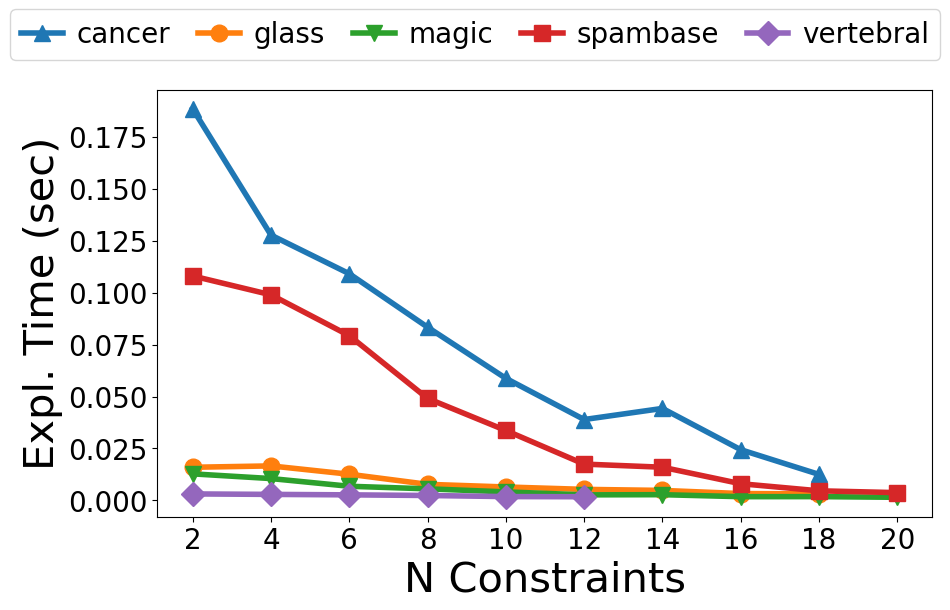

In [4]:
# create viz
fig = plt.figure(figsize=[10, 4.8], frameon=True)
ax = fig.add_subplot(1, 1, 1)
results = df_grouped
xfeature = "nconstr"
yfeature = "sample_time"
line_width = 4
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
ds_markers = {
    "cancer": "^",
    "glass": "o",
    "magic": "v",
    "spambase": "s",
    "vertebral": "D"
}
marker_size = 12
line_width = 4
marker_sizes = {
    "cancer": marker_size,
    "glass": marker_size,
    "magic": marker_size,
    "spambase": marker_size,
    "vertebral": marker_size
}
title = None
xlabel = "N Constraints"
ylabel = "Expl. Time (sec)"
lhorz = True
loc = "upper center"
xrange = None
yrange = None
ylog = False
xlog = False

for ds in results["dataset"].unique():
        is_ds = results["dataset"] == ds
        for expl in results["explainer"].unique():
            is_expl = results["explainer"] == expl
            matching_rows = is_ds & is_expl
            ax.plot(results[matching_rows][xfeature], results[matching_rows][yfeature], label=ds, lw=line_width, marker=ds_markers[ds], ms=marker_sizes[ds], color=ds_colors[ds])

        # title and axis labels
        if title is not None:
            plt.title(title)
        plt.xlabel(xlabel,fontsize=30)
        plt.ylabel(ylabel,fontsize=30)
        # legend
        if lhorz:
            plt.legend(loc=loc, ncol=len(results["dataset"].unique()), bbox_to_anchor=(0, 1.22, 0.82, 0), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size":20})
        else:
            plt.legend(loc=loc)
        # x and y ranges
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            plt.ylim(yrange)
        # x and y scales
        if ylog:
            plt.yscale('log')
        if xlog:
            plt.xscale('log')
        plt.subplots_adjust(top=1.0)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xticks(np.arange(2, 22, 2))

plt.savefig("vary_nconstr.pdf", bbox_inches="tight")

